In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import os


In [3]:
# Dataset paths
train_dir = "/content/drive/MyDrive/PatchInsight - Providing insights into patched vs. non-patched clothing/dataset/train"
val_dir = "/content/drive/MyDrive/PatchInsight - Providing insights into patched vs. non-patched clothing/dataset/validation"

# Image dimensions

batch_size = 16


In [4]:

img_height, img_width = 360, 640  # Choose the resolution of the larger images

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size=(img_height, img_width),  # Resize all images to 360x640
    batch_size=batch_size
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    val_dir,
    image_size=(img_height, img_width),  # Resize all images to 360x640
    batch_size=batch_size
)

# Normalize pixel values (scale to range [0, 1])
normalization_layer = tf.keras.layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))

# Optimize for performance
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)



Found 200 files belonging to 2 classes.
Found 50 files belonging to 2 classes.


## Build Model

### 1. EfficientNetB0

In [5]:
def create_efficientnet_model():
    base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))
    base_model.trainable = False  # Freeze base model layers

    x = base_model.output
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    output = layers.Dense(2, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=output)
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


### 2. ResNet50

In [6]:
def create_resnet50_model():
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))
    base_model.trainable = False

    x = base_model.output
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    output = layers.Dense(2, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=output)
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


### 3. InceptionV3

In [7]:
def create_inceptionv3_model():
    base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))
    base_model.trainable = False

    x = base_model.output
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    output = layers.Dense(2, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=output)
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


## Train Each Model

In [8]:

from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model


# Train EfficientNetB0
efficientnet_model = create_efficientnet_model()
efficientnet_history = efficientnet_model.fit(train_ds, validation_data=val_ds, epochs=10)

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 96s 3s/step - accuracy: 0.5503 - loss: 0.6966 - val_accuracy: 0.5000 - val_loss: 0.7210
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - accuracy: 0.5050 - loss: 0.7273 - val_accuracy: 0.5000 - val_loss: 0.6968
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - accuracy: 0.4264 - loss: 0.7555 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.4971 - loss: 0.7061 - val_accuracy: 0.5000 - val_loss: 0.6933
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - accuracy: 0.4813 - loss: 0.7006 - val_accuracy: 0.5000 - val_loss: 0.6933
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - accuracy: 0.4760 - loss: 0.7000 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - accuracy: 0.4949 - loss: 0.6906 - val_accuracy: 0.5000 - val_loss: 0.6935
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - accuracy

In [9]:


from tensorflow.keras.applications.resnet50 import ResNet50


# Train ResNet50
resnet50_model = create_resnet50_model()
resnet50_history = resnet50_model.fit(train_ds, validation_data=val_ds, epochs=10)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.5981 - loss: 0.9933 - val_accuracy: 1.0000 - val_loss: 0.6012
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 20s 214ms/step - accuracy: 0.5248 - loss: 0.9259 - val_accuracy: 0.5000 - val_loss: 0.6108
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 218ms/step - accuracy: 0.6040 - loss: 0.6650 - val_accuracy: 1.0000 - val_loss: 0.5521
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 210ms/step - accuracy: 0.6704 - loss: 0.6085 - val_accuracy: 0.5000 - val_loss: 0.6175
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 218ms/step - accuracy: 0.6376 - loss: 0.6387 - val_accuracy: 1.0000 - val_loss: 0.5020
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 214ms/step - accuracy: 0.7974 - loss: 0.5121 - val_accuracy: 1.0000 - val_loss: 0.4845
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 212ms/step - accuracy: 0.7275 - loss: 0.5276 - val_accuracy: 1.0000 - val_loss: 0.4485
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 216ms/step - 

In [10]:


from tensorflow.keras.applications.inception_v3 import InceptionV3


# Train InceptionV3
inceptionv3_model = create_inceptionv3_model()
inceptionv3_history = inceptionv3_model.fit(train_ds, validation_data=val_ds, epochs=10)

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 58s 3s/step - accuracy: 0.9142 - loss: 0.2858 - val_accuracy: 1.0000 - val_loss: 0.0063
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 159ms/step - accuracy: 1.0000 - loss: 0.0028 - val_accuracy: 1.0000 - val_loss: 7.3316e-04
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 161ms/step - accuracy: 1.0000 - loss: 0.0015 - val_accuracy: 1.0000 - val_loss: 5.2566e-04
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 162ms/step - accuracy: 1.0000 - loss: 3.4283e-04 - val_accuracy: 1.0000 - val_loss: 5.2431e-04
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 163ms/step - accuracy: 1.0000 - loss: 2.7655e-04 - val_accuracy: 1.0000 - val_loss: 4.7684e-04
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 179ms/step - accuracy: 1.0000 - loss: 2.6243e-04 - val_accuracy: 1.0000 - val_loss: 4.2366e-04
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 164ms/step - accuracy: 1.0000 - loss: 2.5787e-04 - val_accuracy: 1.0000 - val_loss: 3.7780e-04
Epoch 8/10
13/1

 Evaluate Models
Evaluate the validation accuracy for each model:

In [11]:
# Evaluate the validation accuracy for each model:

# Evaluate EfficientNetB0
efficientnet_loss, efficientnet_accuracy = efficientnet_model.evaluate(val_ds)
print(f"EfficientNetB0 Validation Accuracy: {efficientnet_accuracy}")

# Evaluate ResNet50
resnet50_loss, resnet50_accuracy = resnet50_model.evaluate(val_ds)
print(f"ResNet50 Validation Accuracy: {resnet50_accuracy}")

# Evaluate InceptionV3
inceptionv3_loss, inceptionv3_accuracy = inceptionv3_model.evaluate(val_ds)
print(f"InceptionV3 Validation Accuracy: {inceptionv3_accuracy}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.5146 - loss: 0.6927
EfficientNetB0 Validation Accuracy: 0.5
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 128ms/step - accuracy: 0.9448 - loss: 0.4078
ResNet50 Validation Accuracy: 0.9399999976158142
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - accuracy: 1.0000 - loss: 3.2687e-04
InceptionV3 Validation Accuracy: 1.0


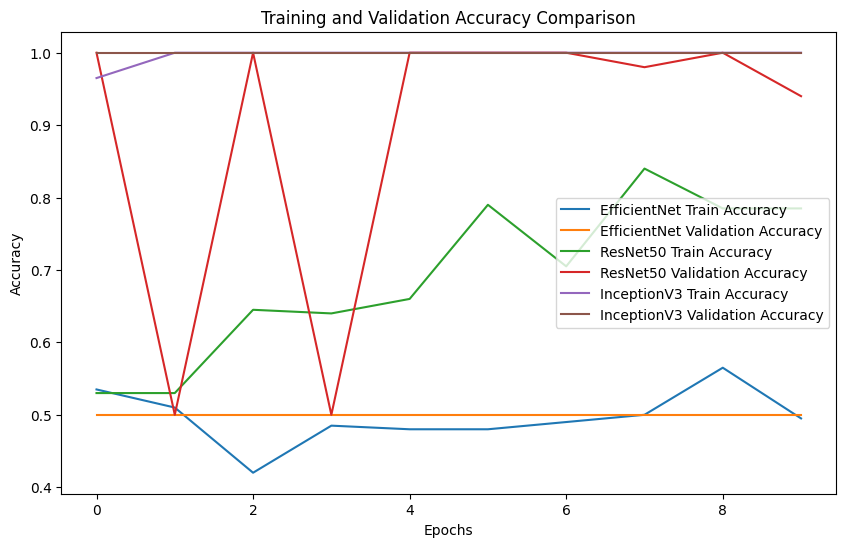

In [12]:

import matplotlib.pyplot as plt

def plot_history(history, label):
    plt.plot(history.history['accuracy'], label=f'{label} Train Accuracy')
    plt.plot(history.history['val_accuracy'], label=f'{label} Validation Accuracy')

plt.figure(figsize=(10, 6))
plot_history(efficientnet_history, 'EfficientNet')
plot_history(resnet50_history, 'ResNet50')
plot_history(inceptionv3_history, 'InceptionV3')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Training and Validation Accuracy Comparison")
plt.show()

## we select InceptionV3 model as future prediction.

### Step 1: Fine-Tune InceptionV3


Epoch 1/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 34s 2s/step - accuracy: 1.0000 - loss: 1.0063e-04 - val_accuracy: 1.0000 - val_loss: 2.8467e-04
Epoch 2/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 161ms/step - accuracy: 1.0000 - loss: 2.9796e-04 - val_accuracy: 1.0000 - val_loss: 2.5237e-04
Epoch 3/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 163ms/step - accuracy: 1.0000 - loss: 1.5150e-04 - val_accuracy: 1.0000 - val_loss: 2.3988e-04
Epoch 4/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 182ms/step - accuracy: 1.0000 - loss: 3.2689e-04 - val_accuracy: 1.0000 - val_loss: 2.1664e-04
Epoch 5/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 165ms/step - accuracy: 1.0000 - loss: 8.4117e-05 - val_accuracy: 1.0000 - val_loss: 1.9772e-04
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 1.0000 - loss: 2.1385e-04 
Fine-Tuned InceptionV3 Validation Accuracy: 1.0


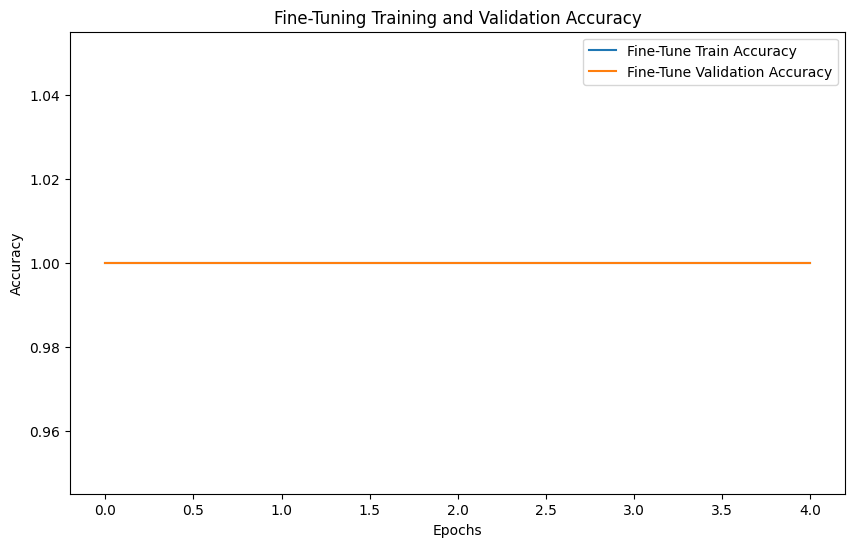

In [13]:

# Fine-tune the selected model by unfreezing some layers of the base model and retraining.

# Unfreeze some layers of the InceptionV3 base model
for layer in inceptionv3_model.layers[-15:]:  # Adjust the number of layers to unfreeze
    layer.trainable = True

# Recompile the model with a lower learning rate for fine-tuning
inceptionv3_model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),
                         loss='sparse_categorical_crossentropy',
                         metrics=['accuracy'])

# Continue training the model with the unfrozen layers
fine_tune_epochs = 5  # Adjust the number of epochs for fine-tuning
fine_tune_history = inceptionv3_model.fit(train_ds,
                                         validation_data=val_ds,
                                         epochs=fine_tune_epochs)


# Evaluate the fine-tuned model
fine_tune_loss, fine_tune_accuracy = inceptionv3_model.evaluate(val_ds)
print(f"Fine-Tuned InceptionV3 Validation Accuracy: {fine_tune_accuracy}")

# Plot training and validation accuracy for fine-tuned model
plt.figure(figsize=(10, 6))
plt.plot(fine_tune_history.history['accuracy'], label='Fine-Tune Train Accuracy')
plt.plot(fine_tune_history.history['val_accuracy'], label='Fine-Tune Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Fine-Tuning Training and Validation Accuracy")
plt.show()

In [14]:
# 2. Hyperparameter Tuning
# Use Keras Tuner to find the optimal hyperparameters for your model, including learning rate, dropout rate, and dense layer units.

!pip install keras-tuner

import keras_tuner as kt

def build_model(hp):
    """Builds a model with hyperparameters to be tuned."""
    base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))
    base_model.trainable = False

    x = base_model.output
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(
        units=hp.Int('units', min_value=32, max_value=256, step=32),
        activation='relu'
    )(x)
    x = layers.Dropout(
        rate=hp.Float('dropout', min_value=0.1, max_value=0.5, step=0.1)
    )(x)
    output = layers.Dense(2, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=output)
    model.compile(
        optimizer=tf.keras.optimizers.Adam(
            hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')
        ),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model


tuner = kt.Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=10,
    factor=3,
    directory='my_dir',
    project_name='inceptionv3_tuning'
)


tuner.search(train_ds, validation_data=val_ds, epochs=10)

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the dense layer is {best_hps.get('units')},
the optimal dropout rate is {best_hps.get('dropout')}, and the optimal learning rate is {best_hps.get('learning_rate')}.
""")

# Build the model with the optimal hyperparameters and train it on the data for a longer period.
model = tuner.hypermodel.build(best_hps)
history = model.fit(train_ds, validation_data=val_ds, epochs=20)


Trial 5 Complete [00h 00m 41s]
val_accuracy: 1.0

Best val_accuracy So Far: 1.0
Total elapsed time: 00h 03m 46s

Search: Running Trial #6

Value             |Best Value So Far |Hyperparameter
256               |32                |units
0.3               |0.4               |dropout
0.0062539         |0.00049429        |learning_rate
2                 |2                 |tuner/epochs
0                 |0                 |tuner/initial_epoch
2                 |2                 |tuner/bracket
0                 |0                 |tuner/round

Epoch 1/2
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 670ms/step - accuracy: 0.7859 - loss: 0.5961

KeyboardInterrupt: 

In [15]:
# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"Best Learning Rate: {best_hps.get('learning_rate')}")
print(f"Best Units: {best_hps.get('units')}")
print(f"Best Dropout: {best_hps.get('dropout')}")

Best Learning Rate: 0.000494289254485023
Best Units: 32
Best Dropout: 0.4


In [16]:
best_model = tuner.hypermodel.build(best_hps)
best_model.fit(train_ds, validation_data=val_ds, epochs=10)


Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.7423 - loss: 0.5381 - val_accuracy: 1.0000 - val_loss: 0.2148
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 158ms/step - accuracy: 1.0000 - loss: 0.1276 - val_accuracy: 1.0000 - val_loss: 0.0631
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 160ms/step - accuracy: 1.0000 - loss: 0.0520 - val_accuracy: 1.0000 - val_loss: 0.0343
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 162ms/step - accuracy: 0.9989 - loss: 0.0434 - val_accuracy: 1.0000 - val_loss: 0.0253
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 166ms/step - accuracy: 1.0000 - loss: 0.0147 - val_accuracy: 1.0000 - val_loss: 0.0161
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 183ms/step - accuracy: 1.0000 - loss: 0.0159 - val_accuracy: 1.0000 - val_loss: 0.0137
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 167ms/step - accuracy: 1.0000 - loss: 0.0234 - val_accuracy: 1.0000 - val_loss: 0.0115
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 164ms/step - accuracy: 1.0000 - loss: 0.0103 - val_accuracy: 1.00

In [17]:


val_loss, val_accuracy = best_model.evaluate(val_ds)
print(f"Final Validation Accuracy: {val_accuracy * 100:.2f}%")

# Save the model for deployment
best_model.save('/content/drive/MyDrive/PatchInsight - Providing insights into patched vs. non-patched clothing/inceptionv3_best_model.h5')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 1.0000 - loss: 0.0074 


Final Validation Accuracy: 100.00%


Saving Ian-Mankin-The-Forfar-and-Newbury-Collection-Newbury-Plain-Podwer-Fabric-FA150-218-Swatch-768x768.jpg to Ian-Mankin-The-Forfar-and-Newbury-Collection-Newbury-Plain-Podwer-Fabric-FA150-218-Swatch-768x768.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
[0.8857597  0.11424026]
Ian-Mankin-The-Forfar-and-Newbury-Collection-Newbury-Plain-Podwer-Fabric-FA150-218-Swatch-768x768.jpg is not Patch


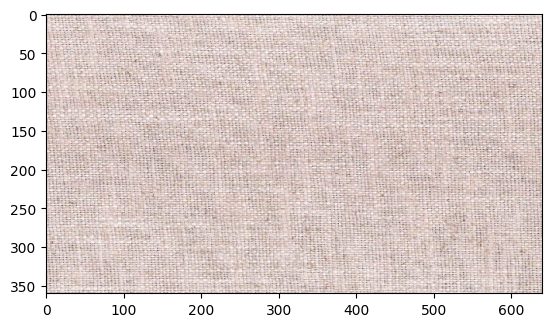

In [22]:
# prompt: clasify image using abve model
# upload image then detect patch or not

from google.colab import files
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

uploaded = files.upload()

for fn in uploaded.keys():
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(img_height, img_width))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x /= 255.0  # Normalize the image

  images = np.vstack([x])
  classes = best_model.predict(images, batch_size=10)
  print(classes[0])

  if classes[0][0] > classes[0][1]:
    print(fn + " is not Patch")
  else:
    print(fn + " is  Patch")

  plt.imshow(img)
  plt.show()